<a href="https://colab.research.google.com/github/KaioViana/data-science-primeiros-passos/blob/master/introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análises de um dataset de avaliação de filmes real fornecido pelo GroupLens**

# **Analizando as notas em geral**

In [0]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
# os cinco primeiros dados do arquivo
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# vendo o formato do dataframe
notas.shape

(100836, 4)

In [0]:
# mudando o nome das colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head() # vendo novamente

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# mostrando os valores únicos da coluna 'nota'
sorted(notas['nota'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [0]:
# contando a frequência de cada nota
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [0]:
# média das notas
print('Média', notas['nota'].mean())
print('Mediana', notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [0]:
# maneira diferente de ler um coluna
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

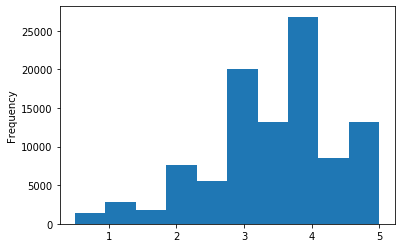

In [0]:
# plotando histograma dos valores da coluna nota
notas.nota.plot(kind='hist')

In [0]:
# Descrevendo os dados (diversas medidas de descrição)
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

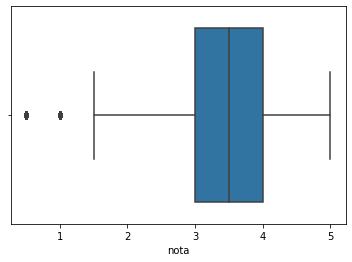

In [0]:
# Seaborn
import seaborn as sns
# boxplot
sns.boxplot(notas.nota)

#**Olhando os filmes**

In [0]:
# arquivo movies
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#**Analizando algumas notas espcíficas por filme**

In [0]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [0]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [0]:
# agrupando pelo filmeId tirando a média
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head(30)

filmeId
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
11    3.671429
12    2.421053
13    3.125000
14    3.833333
15    3.000000
16    3.926829
17    3.776119
18    3.700000
19    2.727273
20    2.500000
21    3.494382
22    3.222222
23    3.125000
24    3.125000
25    3.625000
26    3.500000
27    3.333333
28    4.227273
29    4.013158
30    3.000000
Name: nota, dtype: float64

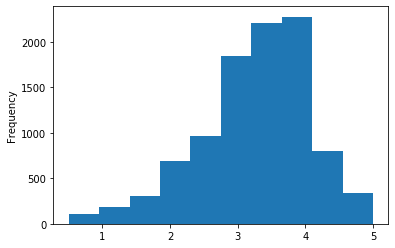

In [0]:
# plotando as notas médias
medias_por_filme.plot(kind='hist')

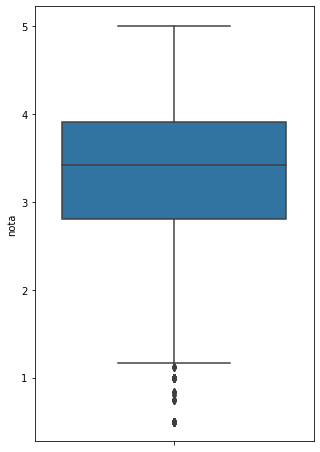

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
# DISTRIBUIÇÃO das médias dos filmes
sns.boxplot(y=medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

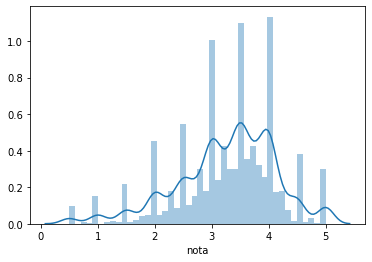

In [0]:
# Gráfico de distribuição seaborn
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos  filmes')

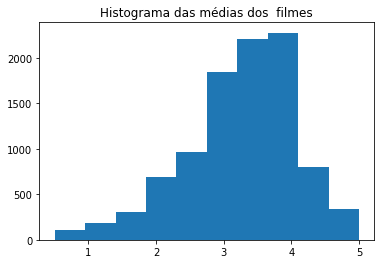

In [0]:
# o pandas e o seaborn utiliza por baixo dos panos a lib matplotlib
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos  filmes')

In [0]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
# variável categórica nominal
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [0]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
cs       2
ta       2
id       2
ro       2
ar       2
te       1
pl       1
hu       1
nb       1
el       1
sl       1
af       1
is       1
ky       1
tr       1
xx       1
vi       1
ps       1
no       1
Name: original_language, dtype: int64

In [0]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


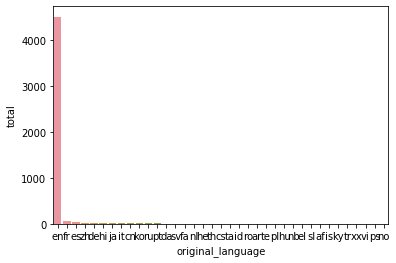

In [0]:
# plot de categorias
# gráfico de barra
# baixo nível
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

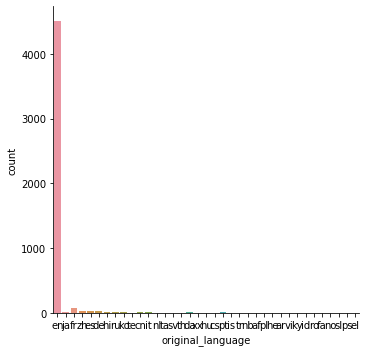

In [0]:
# alto nível
sns.catplot(x='original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x7fa9b4524d30>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

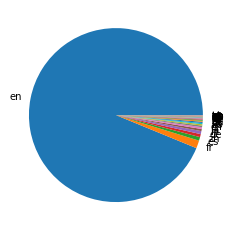

In [0]:
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

In [0]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_en = total_por_lingua.loc['en']
total_resto = total_geral - total_en
print(total_en, total_resto)
print(total_geral)
print(total_por_lingua)

4505 298
4803
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
cs       2
ta       2
id       2
ro       2
ar       2
te       1
pl       1
hu       1
nb       1
el       1
sl       1
af       1
is       1
ky       1
tr       1
xx       1
vi       1
ps       1
no       1
Name: original_language, dtype: int64


   lingua  total
0  ingles   4505
1  outros    298


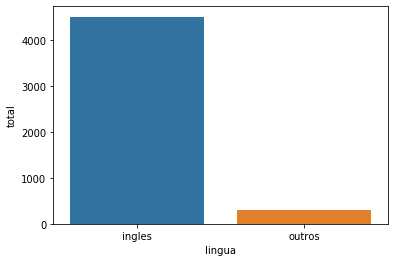

In [0]:
# criando um dataframe dos dados para fazer o barplot(cada chave é uma coluna e seus valores as linhas) 
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_en, total_resto]
}
dados = pd.DataFrame(dados)
print(dados)
sns.barplot(x=dados['lingua'], y=dados['total'])

([<matplotlib.patches.Wedge at 0x7fa9b43b7320>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

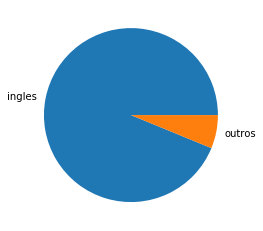

In [0]:
plt.pie(dados['total'], labels=dados['lingua'])

In [0]:
# vendo como esta a distribuição das outras línguas
filmes_em_outras_linguas = tmdb.query('original_language != "en"').original_language.value_counts()
filmes_nao_em_en = tmdb.query('original_language != "en"')
filmes_em_outras_linguas

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ro     2
id     2
ta     2
cs     2
ar     2
pl     1
af     1
xx     1
hu     1
is     1
te     1
no     1
nb     1
el     1
vi     1
ps     1
sl     1
tr     1
ky     1
Name: original_language, dtype: int64

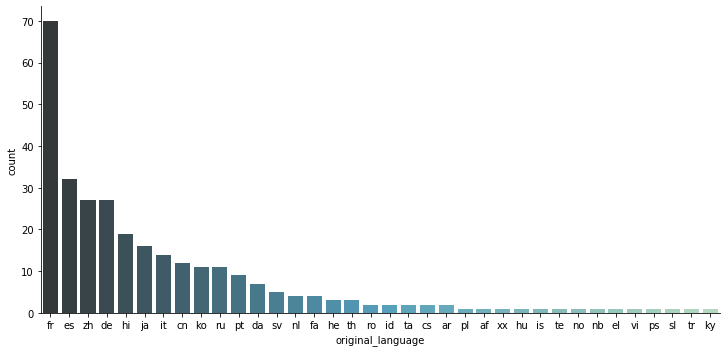

In [0]:
sns.catplot(x='original_language', kind='count', data=filmes_nao_em_en, aspect=2, order=filmes_em_outras_linguas.index, palette="GnBu_d")

In [0]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [0]:
print(f'Nota média do Toy Story {notas_do_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji {notas_do_jumanji.nota.mean():.2f}')

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [0]:
print(f'Mediana do Toy Story {notas_do_toy_story.nota.median():.2f}')
print(f'Mediana do Jumanji {notas_do_jumanji.nota.median():.2f}')

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [0]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

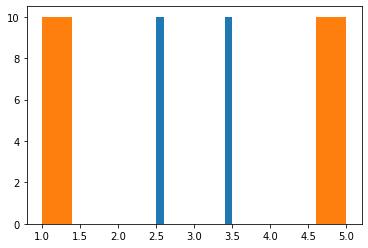

In [0]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa9b0ce89e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa9b0c773c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9b0c77da0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9b0c77a58>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa9b0ce8cf8>,
  <matplotlib.lines.Line2D at 0x7fa9b0c837b8>]}

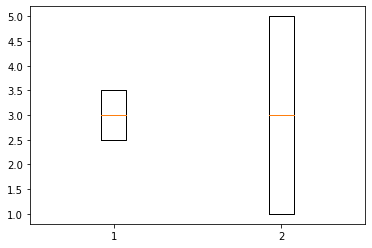

In [0]:
plt.boxplot([filme1, filme2])

In [0]:
# desvio padrão dos filmes
print(filme1.std())
print(filme2.std())

0.5
2.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa9b0b17d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa9b0b28710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9b0ab1128>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9b0b28da0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa9b0b28080>,
  <matplotlib.lines.Line2D at 0x7fa9b0ab1b00>]}

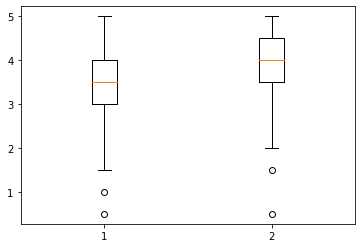

In [0]:
plt.boxplot([notas_do_jumanji.nota, notas_do_toy_story.nota])

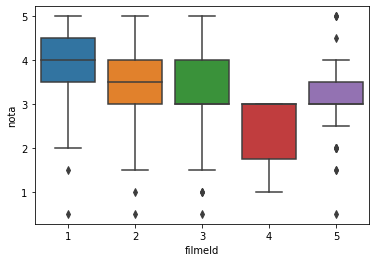

In [0]:
# fazendo o boxplot apenas dos filmes que estão entre a nota 1 e 2 com uma query
sns.boxplot(x='filmeId', y='nota', data=notas.query('filmeId in [1, 2, 3, 4, 5]'))

In [0]:
# cálculo do desvio padrão
print(notas_do_toy_story.nota.std())
print(notas_do_jumanji.nota.std())

0.8348591407114045
0.8817134921476455
